#Importando as bibliotecas

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras

In [ ]:
from keras.utils.vis_utils import plot_model

In [2]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten

#Carregando os dados

In [3]:
X = pd.read_csv("https://raw.githubusercontent.com/jrandrade07/DataSets/main/OSI_feats_e3.csv")
y = pd.read_csv("https://raw.githubusercontent.com/jrandrade07/DataSets/main/OSI_target_e2.csv")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Modelo Sequencial

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=1))
model.add(Dense(1))

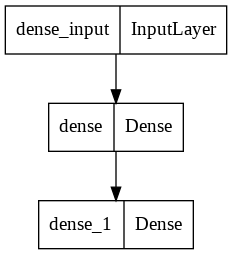

In [ ]:
plot_model(model)

# Construindo um Modelo

In [ ]:
# 2. Definir o modelo
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
X.shape[1]

68

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                828       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3. Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 4. Ajustar o modelo aos dados
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
1233/1233 [==============================] - 4s 2ms/step - loss: 1.8362 - accuracy: 0.8389
Epoch 2/150
1233/1233 [==============================] - 5s 4ms/step - loss: 0.4265 - accuracy: 0.8682
Epoch 3/150
1233/1233 [==============================] - 4s 3ms/step - loss: 0.4072 - accuracy: 0.8663
Epoch 4/150
1233/1233 [==============================] - 4s 3ms/step - loss: 0.3547 - accuracy: 0.8757
Epoch 5/150
1233/1233 [==============================] - 6s 4ms/step - loss: 0.3331 - accuracy: 0.8765
Epoch 6/150
1233/1233 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.8792
Epoch 7/150
1233/1233 [==============================] - 2s 2ms/step - loss: 0.3100 - accuracy: 0.8775
Epoch 8/150
1233/1233 [==============================] - 2s 2ms/step - loss: 0.2920 - accuracy: 0.8812
Epoch 9/150
1233/1233 [==============================] - 2s 2ms/step - loss: 0.2835 - accuracy: 0.8833
Epoch 10/150
1233/1233 [==============================] - 2s 2ms/step - l

In [ ]:
# 5. Avaliar o modelo
_, accuracy = model.evaluate(X, y)
print('Acurácia: %.2f' % (accuracy*100))

386/386 [==============================] - 1s 1ms/step - loss: 0.2256 - accuracy: 0.8984
Acurácia: 89.84


In [ ]:
# 6. Fazer predições
pred = (model.predict(X) > 0.5).astype("int32")

In [ ]:
for i in range(10):
  print('%s (real: %d | predito: %d)' % (X[i].tolist(), y[i], pred[i]))

KeyError: ignored